In [54]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import display
import numpy as np

df = pd.read_csv("pcap.csv")
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,18.211.118.21,192.168.1.248,TCP,66,443 > 33100 [ACK] Seq=1 Ack=1 Win=17 Len=0 T...
1,2,0.000465,18.211.118.21,192.168.1.248,TLSv1.2,122,Application Data
2,3,0.433247,149.112.112.112,192.168.1.248,TCP,66,443 > 52906 [ACK] Seq=1 Ack=1 Win=588 Len=0 ...
3,4,0.579567,149.112.112.112,192.168.1.248,TLSv1.2,313,Application Data
4,5,1.048138,208.85.40.20,192.168.1.248,TCP,66,443 > 42740 [ACK] Seq=1 Ack=1 Win=65535 Len=...


## Sample correlation

Last week, I looked at the "Length" variable in relationship to "Time".  As I stated before, these do not have a linear relationship (nor any relationship that I can see).  The r-value is 0.066, pretty close to zero.  However, I failed to see the relationship between sequence number ("No.") and "Time".  It has an r-value of 0.98, very close to 1.  If we look at it's scatter plot, we see a nice linear relationship.

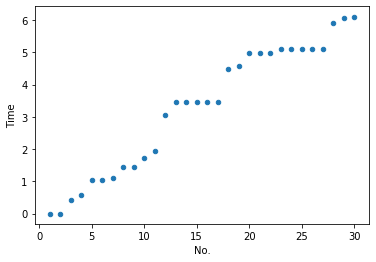

In [56]:
_ = df.plot.scatter(x="No.", y="Time")

## Line of best fit

Given some sample data, one would be able to predict the time to expect a certain sequence number within a reasonable range.  I have plotted the best fit line out to a value of 40.  You might expect the 40th packet around the 8 second mark according to my data.

At first glance, this may appear to be a trivial relationship, but packet captures "in the wild" vary wildly depending on the applications being supported by the network.  This type of analysis could be valuable especially when troubleshooting real-time applications such as video or voice traffic.

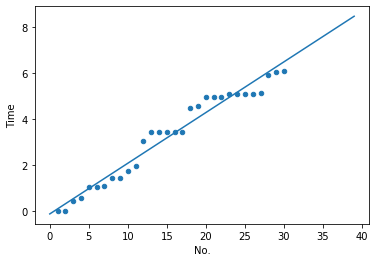

In [57]:
from matplotlib.pyplot import figure

n = len(df)
a = ( sum(df["Time"])*sum(df["No."]**2)-sum(df["No."])*sum(df["No."]*df["Time"]) ) / \
    (n * sum(df["No."]**2) - sum(df["No."])**2)
b = ( n *sum(df["No."]*df["Time"]) - sum(df["No."])*sum(df["Time"]) ) / \
    (n * sum(df["No."]**2) - sum(df["No."])**2)

x = np.array(range(40))
_ = df.plot.scatter(x="No.", y="Time")
_ = plt.plot(x, a + b * x)
